# 神经网络识别MNIST数据集

本文档主要用于补充博文[神经网络理论介绍及实现](http://www.mrpanc.com/p/3045050681/)。在运行代码之前请确认已根据[readme](../README.md)文档中的描述安装好所需要的依赖包，否则代码可能无法正常运行。

## 导入相关包

神经网络和导入MNIST数据集的代码实现在博文中已经进行了说明，完整实现可查看[network1.py](./network1.py)以及[mnist_loader.py](./mnist_loader.py)。

In [16]:
from network1 import Network
import mnist_loader
import numpy as np
import matplotlib.pyplot as plt
import visualization

## 网络初始化

首先我们初始化一个3层神经网络，输入层有2个神经元，隐藏层有3个神经元，输出层有一个神经元。初始化过程和结果如下：

In [2]:
net = Network([2,3,1])
print(net.biases)
print(net.weights)

[array([[-0.27071232],
       [ 0.10484805],
       [ 0.25052782]]), array([[-0.92519997]])]
[array([[ 0.56714366, -1.04018022],
       [-0.15367595,  0.78985181],
       [-1.22621585, -0.94800699]]), array([[-0.56965394, -0.97715021, -0.77063171]])]


## 导入数据集

导入训练集和测试集，其中训练集共有60000条数据，测试集共有10000条数据。

In [3]:
%%time
training_data, test_data = mnist_loader.load_data_wrapper("../data")
print("Number of training data: {} \nNumber of test data: {}".format(len(training_data), len(test_data)))

Number of training data: 60000 
Number of test data: 10000
CPU times: user 10.1 s, sys: 1.42 s, total: 11.5 s
Wall time: 11.8 s


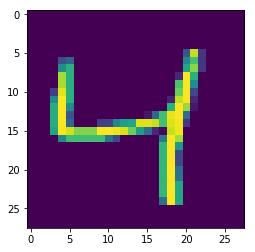

In [22]:
example_num = 2
example = training_data[example_num]
visualization.plot_mnist_image(example[0])
visualization.save_imgae("../image/mnist_example.jpg", plt)
plt.show()

## 训练

> 训练数据时使用的电脑型号为MacBook Pro (13-inch, Early 2015)，时间仅供参考

首先我们构建一个3层神经网络，其中输入层共有784个神经元，即$28\times28$，隐藏层共有30个神经元，输出层共有10个神经元。然后我们进行参数设置：总的训练次数`epoches=30`，每次迭代计算的数据集大小`mini_batch_size=10`，学习率`alpha=3`，并在每次训练完整个数据集，即经历一次`epoch`后，根据当前训练结果在测试集上进行验证，输出准确率。
根据训练结果，我们可以发现第一次`epoch`结束后，准确率就已经到达了$91.21\%$，并在经过30个`epoches`后，准确率到达了$95.29\%$，这无疑是一个好的开端。

In [4]:
%%time
net = Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3, test_data=test_data)

Epoch 0: 9121 / 10000
Epoch 1: 9222 / 10000
Epoch 2: 9302 / 10000
Epoch 3: 9369 / 10000
Epoch 4: 9356 / 10000
Epoch 5: 9437 / 10000
Epoch 6: 9369 / 10000
Epoch 7: 9433 / 10000
Epoch 8: 9457 / 10000
Epoch 9: 9458 / 10000
Epoch 10: 9457 / 10000
Epoch 11: 9460 / 10000
Epoch 12: 9488 / 10000
Epoch 13: 9478 / 10000
Epoch 14: 9480 / 10000
Epoch 15: 9508 / 10000
Epoch 16: 9475 / 10000
Epoch 17: 9494 / 10000
Epoch 18: 9510 / 10000
Epoch 19: 9498 / 10000
Epoch 20: 9501 / 10000
Epoch 21: 9499 / 10000
Epoch 22: 9510 / 10000
Epoch 23: 9506 / 10000
Epoch 24: 9513 / 10000
Epoch 25: 9503 / 10000
Epoch 26: 9508 / 10000
Epoch 27: 9513 / 10000
Epoch 28: 9508 / 10000
Epoch 29: 9529 / 10000
CPU times: user 3min 48s, sys: 4.36 s, total: 3min 52s
Wall time: 3min 53s


接下来我们调整隐藏层的神经元数目，观察训练的效果。首先将隐藏层神经元设置为50个进行训练，观察结果可以发现准确率上升到了$96.02\%$，效果还是较为客观的。但在效果提升的同时，训练时间也从$3min 53s$上升到了$5min 15s$。接下来我们继续增加隐藏层数目，将其设置为60，并设置`epoches=100`，发现准确率变为了$87.84\%$，较之前反而下降了，并且训练的时间也延长到了$27min 15s$。因此在设置隐藏层数目时，不能盲目的增加隐藏层数目，否则只会费力不讨好，既降低了准确率，又增加了训练所需时间。比较好的办法是先根据经验设置一个初始值，然后在初始值的基础上慢慢增加，从而得到一个合理的数字。

In [5]:
%%time
net = Network([784, 50, 10])
net.SGD(training_data, 30, 10, 3, test_data=test_data)

Epoch 0: 9176 / 10000
Epoch 1: 9307 / 10000
Epoch 2: 9416 / 10000
Epoch 3: 9441 / 10000
Epoch 4: 9480 / 10000
Epoch 5: 9480 / 10000
Epoch 6: 9511 / 10000
Epoch 7: 9529 / 10000
Epoch 8: 9508 / 10000
Epoch 9: 9522 / 10000
Epoch 10: 9554 / 10000
Epoch 11: 9556 / 10000
Epoch 12: 9570 / 10000
Epoch 13: 9578 / 10000
Epoch 14: 9560 / 10000
Epoch 15: 9580 / 10000
Epoch 16: 9589 / 10000
Epoch 17: 9575 / 10000
Epoch 18: 9591 / 10000
Epoch 19: 9575 / 10000
Epoch 20: 9577 / 10000
Epoch 21: 9563 / 10000
Epoch 22: 9588 / 10000
Epoch 23: 9592 / 10000
Epoch 24: 9596 / 10000
Epoch 25: 9584 / 10000
Epoch 26: 9602 / 10000
Epoch 27: 9581 / 10000
Epoch 28: 9582 / 10000
Epoch 29: 9599 / 10000
CPU times: user 5min 11s, sys: 4.21 s, total: 5min 15s
Wall time: 5min 15s


In [6]:
%%time
net = Network([784, 100, 10])
net.SGD(training_data, 60, 10, 3, test_data=test_data)

Epoch 0: 7308 / 10000
Epoch 1: 7572 / 10000
Epoch 2: 7642 / 10000
Epoch 3: 8604 / 10000
Epoch 4: 8644 / 10000
Epoch 5: 8655 / 10000
Epoch 6: 8665 / 10000
Epoch 7: 8671 / 10000
Epoch 8: 8696 / 10000
Epoch 9: 8704 / 10000
Epoch 10: 8676 / 10000
Epoch 11: 8700 / 10000
Epoch 12: 8718 / 10000
Epoch 13: 8717 / 10000
Epoch 14: 8722 / 10000
Epoch 15: 8721 / 10000
Epoch 16: 8738 / 10000
Epoch 17: 8737 / 10000
Epoch 18: 8739 / 10000
Epoch 19: 8735 / 10000
Epoch 20: 8741 / 10000
Epoch 21: 8737 / 10000
Epoch 22: 8733 / 10000
Epoch 23: 8745 / 10000
Epoch 24: 8752 / 10000
Epoch 25: 8739 / 10000
Epoch 26: 8746 / 10000
Epoch 27: 8747 / 10000
Epoch 28: 8755 / 10000
Epoch 29: 8745 / 10000
Epoch 30: 8754 / 10000
Epoch 31: 8754 / 10000
Epoch 32: 8757 / 10000
Epoch 33: 8753 / 10000
Epoch 34: 8757 / 10000
Epoch 35: 8760 / 10000
Epoch 36: 8753 / 10000
Epoch 37: 8759 / 10000
Epoch 38: 8752 / 10000
Epoch 39: 8748 / 10000
Epoch 40: 8760 / 10000
Epoch 41: 8759 / 10000
Epoch 42: 8762 / 10000
Epoch 43: 8762 / 1000